<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas </h3></center>

<center><h3>Por: France Martínez </h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudantía
## 1.1 Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>




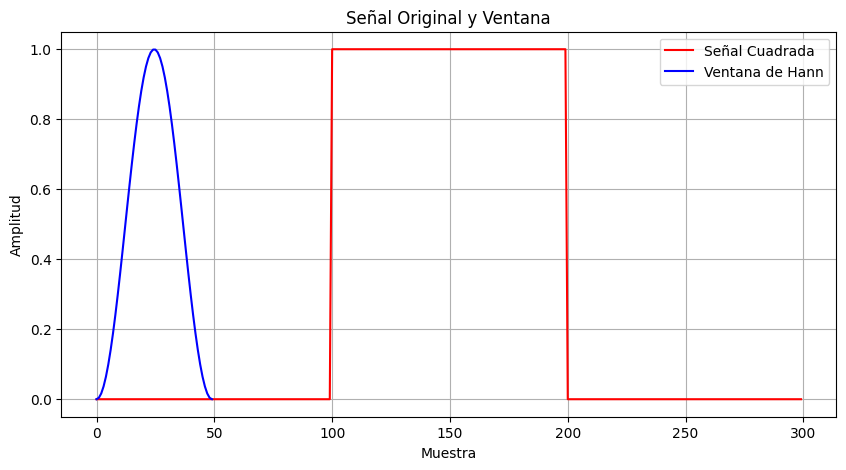

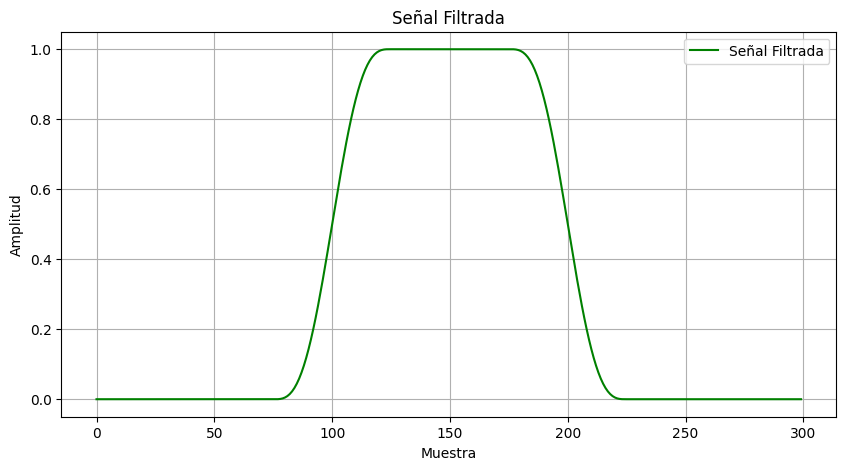

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

senal = np.repeat([0., 1., 0.], 100) # Se genera una señal cuadrada
ventana = signal.windows.hann(50) # Se establece una ventana de Hann

# Señal Original y Ventana
fig1, ax1 = plt.subplots(figsize=(10, 5)) # Creamos la primera figura y su eje
ax1.plot(senal, color="r", label="Señal Cuadrada")
ax1.plot(ventana, color="b", label="Ventana de Hann")
ax1.grid(True)
ax1.set_title("Señal Original y Ventana")
ax1.set_xlabel("Muestra")
ax1.set_ylabel("Amplitud")
ax1.legend()

# Señal Filtrada
senal_filtrada = signal.convolve(senal, ventana, mode="same") / np.sum(ventana) # Convolución y normalización
fig2, ax2 = plt.subplots(figsize=(10, 5)) # Se crea la segunda figura
ax2.plot(senal_filtrada, color="g", label="Señal Filtrada")
ax2.grid(True)
ax2.set_title("Señal Filtrada")
ax2.set_xlabel("Muestra")
ax2.set_ylabel("Amplitud")
ax2.legend()

plt.show()

## 1.2 Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.

C:\Users\frama\AppData\Local\Temp\ipykernel_24304\1374322487.py:16: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(audio_filename)


Tasa de muestreo: 44100 Hz
Número de muestras: 1764000
Duración: 40.00 segundos


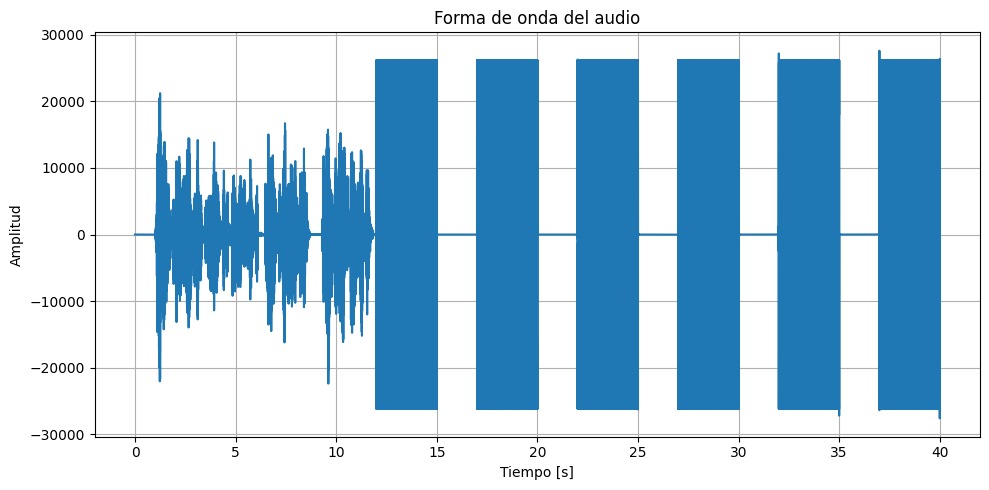

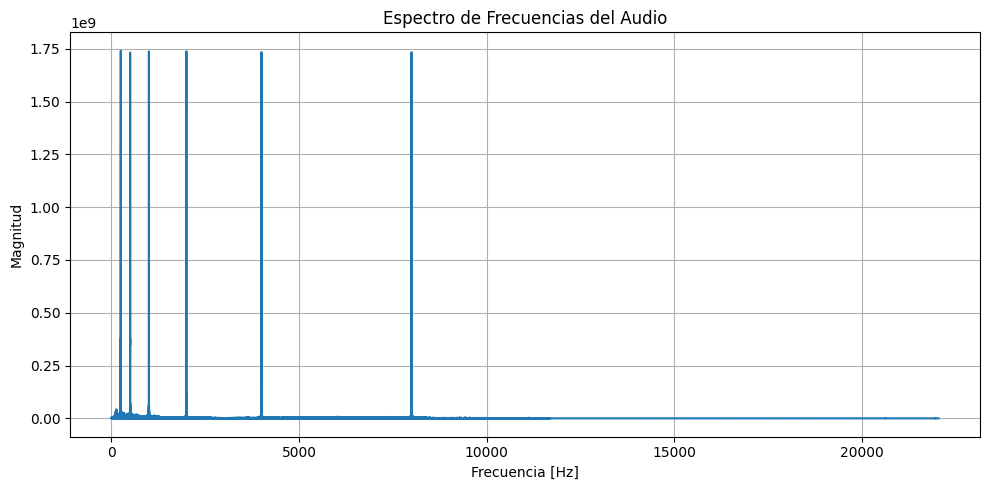

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
import os

# === Cargar archivo de audio local ===
# Cambia este nombre por el nombre de tu archivo .wav
audio_filename = "pure-tone.wav"

# Verifica que el archivo exista
if not os.path.exists(audio_filename):
    raise FileNotFoundError(f"No se encontró el archivo: {audio_filename}")

# Leer el archivo de audio
sample_rate, audio_data = wavfile.read(audio_filename)

# Si el audio es estéreo, tomar solo un canal
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]

# Mostrar información básica
print(f"Tasa de muestreo: {sample_rate} Hz")
print(f"Número de muestras: {len(audio_data)}")
duration = len(audio_data) / sample_rate
print(f"Duración: {duration:.2f} segundos")

# === Mostrar forma de onda ===
plt.figure(figsize=(10, 5))
time_axis = np.linspace(0, duration, len(audio_data))
plt.plot(time_axis, audio_data)
plt.title("Forma de onda del audio")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# FFT
N = len(audio_data)
yf = fft(audio_data)
xf = fftfreq(N, 1 / sample_rate)

# Tomar la mitad del espectro (frecuencias positivas)
xf = xf[:N // 2]
yf = np.abs(yf[:N // 2])

# Graficar espectro de frecuencias
plt.figure(figsize=(10, 5))
plt.plot(xf, yf)
plt.title("Espectro de Frecuencias del Audio")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


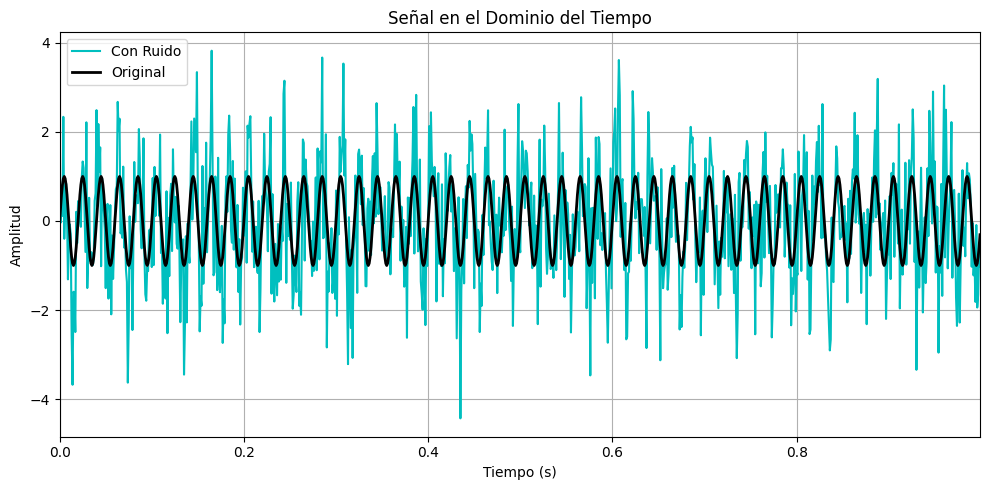

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
dt = 0.001
t = np.arange(0, 1, dt)
frecuencia_sinusoidal = 50
senal_original = np.sin(2 * np.pi * frecuencia_sinusoidal * t)

# Agregar ruido
ruido = np.random.randn(len(t))
senal_con_ruido = senal_original + ruido

# Visualización en el dominio del tiempo
plt.figure(figsize=(10, 5))
plt.plot(t, senal_con_ruido, color="c", linewidth=1.5, label="Con Ruido")
plt.plot(t, senal_original, color="k", linewidth=2, label="Original")
plt.title("Señal en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(t[0], t[-1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

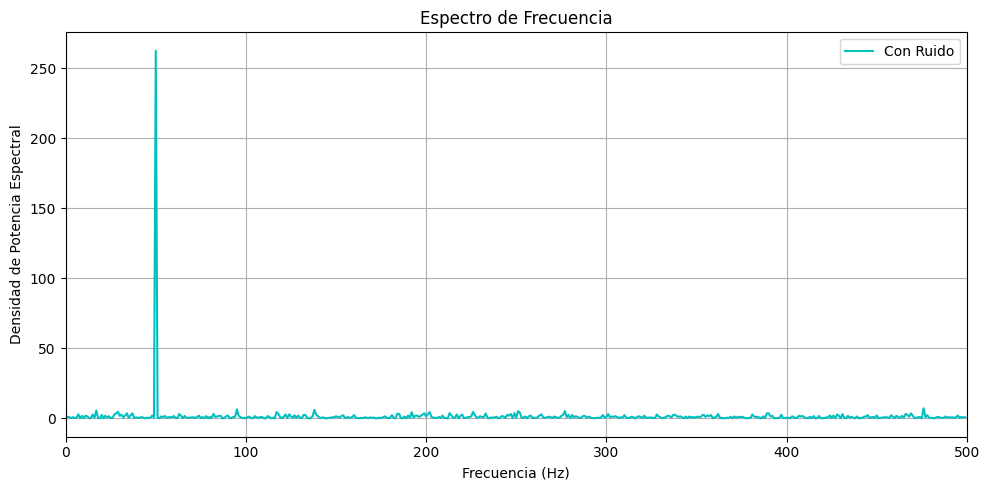

In [5]:
# Análisis en el dominio de la frecuencia
n = len(t)
transformada_fft = np.fft.fft(senal_con_ruido)
espectro_potencia = np.abs(transformada_fft)**2 / n  # Usamos la potencia del espectro
frecuencias = np.fft.fftfreq(n, dt)
indices_positivos = np.where(frecuencias >= 0)[0] # Consideramos solo frecuencias positivas

plt.figure(figsize=(10, 5))
plt.plot(frecuencias[indices_positivos], espectro_potencia[indices_positivos], color="c", linewidth=1.5, label="Con Ruido")
plt.title("Espectro de Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad de Potencia Espectral")
plt.xlim(0, 1/(2*dt)) # Límite hasta la frecuencia de Nyquist
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

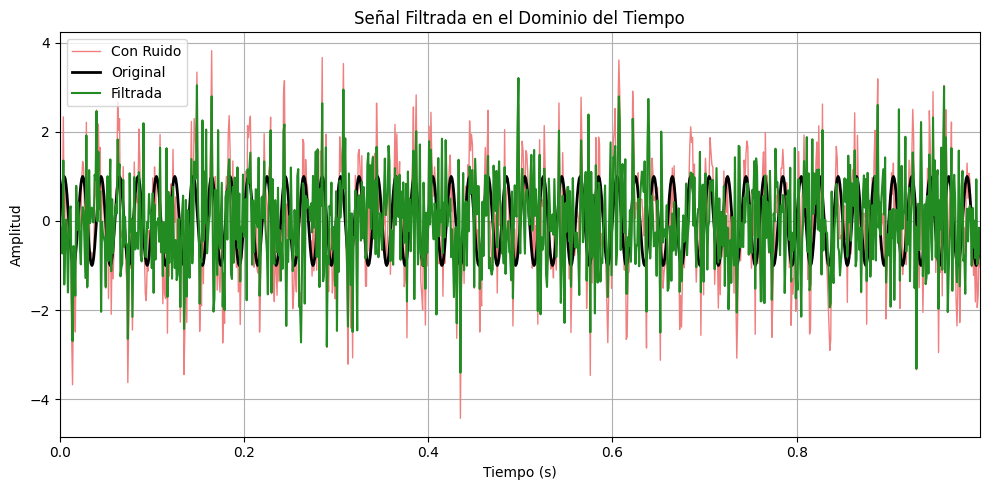

In [6]:
# Filtrado básico en el dominio de la frecuencia
umbral_potencia = 100
indices_ruido = espectro_potencia > umbral_potencia
transformada_fft_filtrada = transformada_fft.copy()
transformada_fft_filtrada[indices_ruido] = 0  # Atenuamos las frecuencias con alta potencia (ruido)

senal_filtrada = np.fft.ifft(transformada_fft_filtrada).real # Volvemos al dominio del tiempo (parte real)

# Visualización de la señal filtrada
plt.figure(figsize=(10, 5))
plt.plot(t, senal_con_ruido, color="lightcoral", linewidth=1, label="Con Ruido")
plt.plot(t, senal_original, color="k", linewidth=2, label="Original")
plt.plot(t, senal_filtrada, color="forestgreen", linewidth=1.5, label="Filtrada")
plt.title("Señal Filtrada en el Dominio del Tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xlim(t[0], t[-1])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

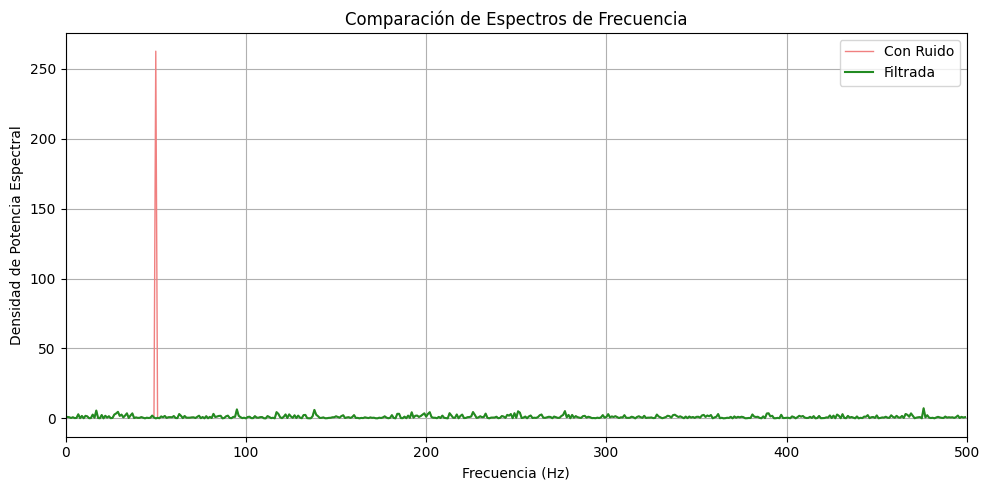

In [7]:
# Comparación de espectros
espectro_potencia_filtrado = np.abs(transformada_fft_filtrada)**2 / n

plt.figure(figsize=(10, 5))
plt.plot(frecuencias[indices_positivos], espectro_potencia[indices_positivos], color="lightcoral", linewidth=1, label="Con Ruido")
plt.plot(frecuencias[indices_positivos], espectro_potencia_filtrado[indices_positivos], color="forestgreen", linewidth=1.5, label="Filtrada")
plt.title("Comparación de Espectros de Frecuencia")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad de Potencia Espectral")
plt.xlim(0, 1/(2*dt))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [8]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
  factor1=2/((np.sqrt(3)*sigma)*np.pi**(1/4)) #subdividimos en 3 factores el mexican hut por simplicidad
  factor2=(1-(x**2)/sigma**2)
  wavelet=factor1*factor2*np.exp(-x**2/(2*sigma**2))
  return wavelet


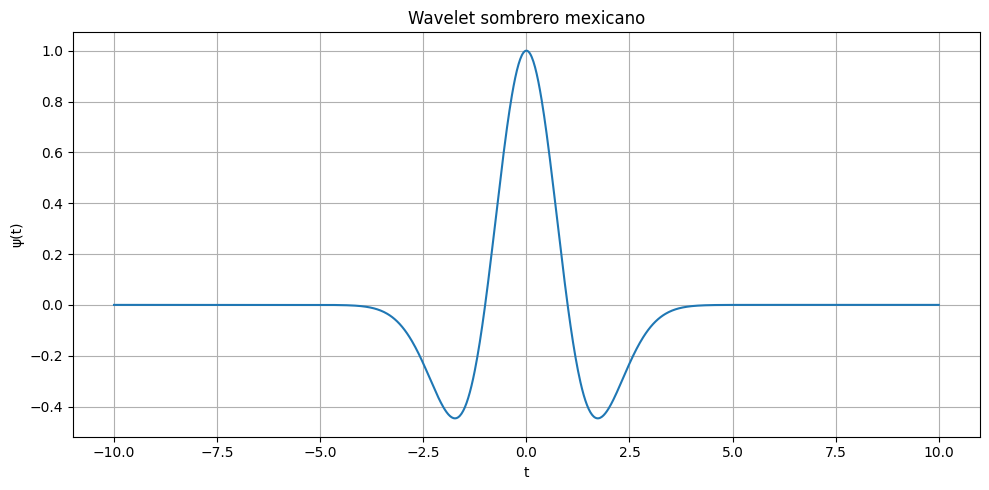

In [34]:
x=np.linspace(-10,10,1000)
y = mexican_hat(x,0,1)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title("Wavelet sombrero mexicano")
plt.xlabel("t")
plt.ylabel("ψ(t)")
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

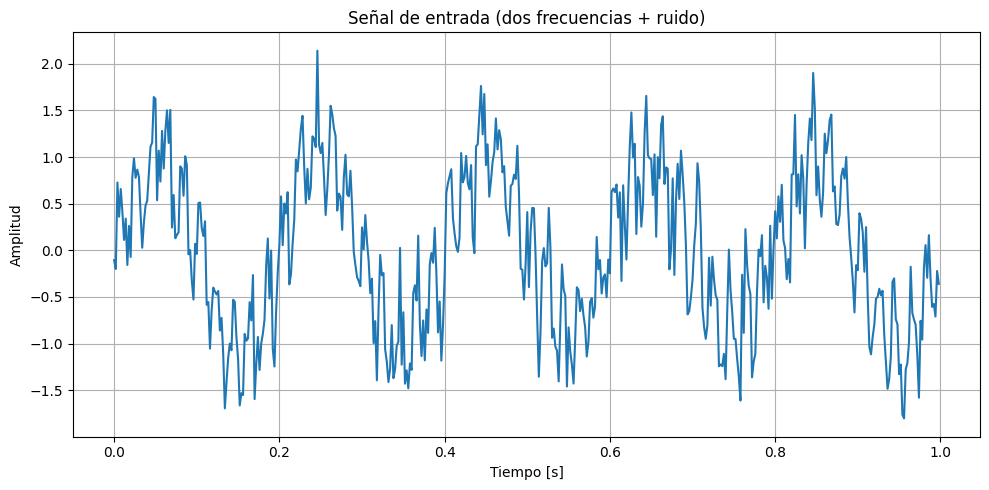

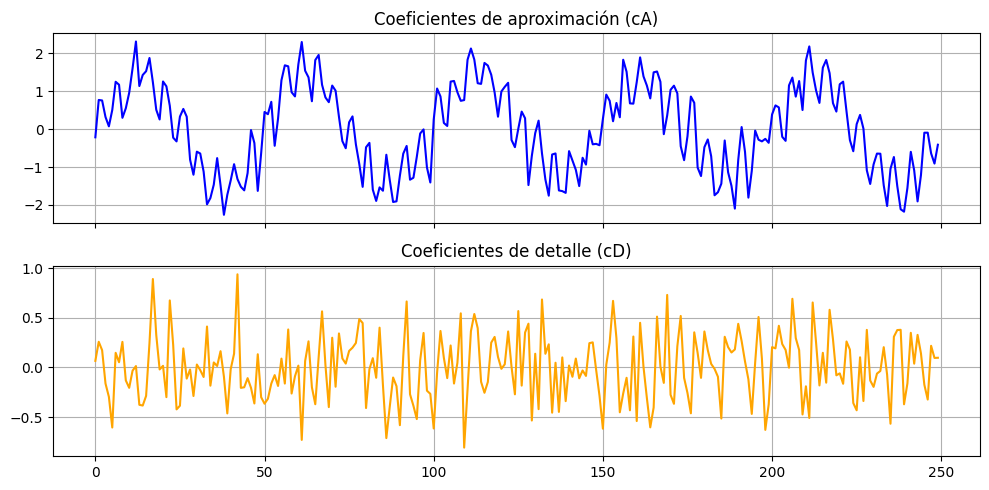

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Definir una señal de ejemplo: suma de dos senoidales con ruido
fs = 500  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)
f1, f2 = 5, 50  # Frecuencias de las senoidales
signal = np.sin(2 * np.pi * f1 * t) + 0.5 * np.sin(2 * np.pi * f2 * t)
signal += 0.3 * np.random.randn(*t.shape)  # Agregar ruido

# Graficar la señal original
plt.figure(figsize=(10, 5))
plt.plot(t, signal)
plt.title("Señal de entrada (dos frecuencias + ruido)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.grid(True)
plt.tight_layout()
plt.show()

# Aplicar la Transformada Wavelet Discreta nivel 1 usando wavelet Haar
wavelet = 'haar'
cA, cD = pywt.dwt(signal, wavelet)

# Graficar los coeficientes
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
axs[0].plot(cA, color='blue')
axs[0].set_title("Coeficientes de aproximación (cA)")
axs[0].grid(True)
axs[1].plot(cD, color='orange')
axs[1].set_title("Coeficientes de detalle (cD)")
axs[1].grid(True)
plt.tight_layout()
plt.show()


###  3.2.1. Explica el siguiente fragmento de código en detalle

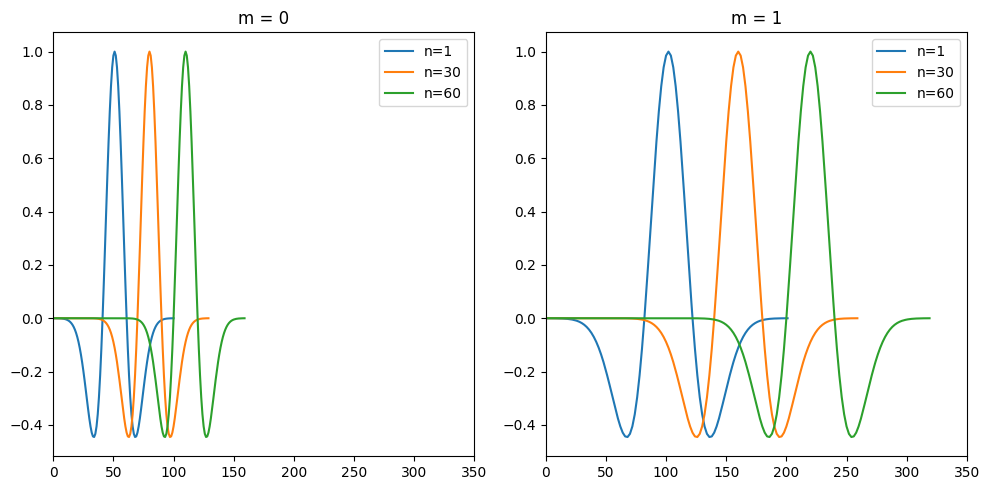

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la wavelet sombrero mexicano
def mexican_hat(t, mu=0, sigma=1):
    t_scaled = (t - mu) / sigma
    return (1 - t_scaled**2) * np.exp(-t_scaled**2 / 2)

# Definir psi_mn como wavelet escalada y trasladada
def psi_mn(psi, m, n):
    a = 2**m
    b = n * a
    length = len(psi) * a + b
    wav = np.zeros(length)
    wav[b:b + len(psi) * a] = np.interp(np.arange(len(psi) * a) / a, np.arange(len(psi)), psi)
    return wav

# Wavelet base
psi = mexican_hat(np.arange(-5, 5, 0.1))

# Rango de visualización
xlim = (0, 350)
ns = [1, 30, 60]
ms = [0, 1]

# Graficar
plt.figure(figsize=(10, 5))

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1, len(ms), mi + 1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label=f"n={n}")
    plt.title(f"m = {m}")
    plt.legend(loc="best")
    plt.xlim(xlim)

plt.tight_layout()
plt.show()


En esta sección se visualizan distintas versiones de una función wavelet madre, específicamente la **wavelet sombrero mexicano**, al ser modificada por **factores de escala y traslación** discretos. Esto se realiza mediante la fórmula general para una wavelet discreta:

$
\psi_{m,n}(x) = a_0^{-m/2} \cdot \psi\left( \frac{x - n b_0 a_0^m}{a_0^m} \right)
$

donde:

$a_0 = 2$ es la base del escalamiento (zoom),
$b_0 = 1$ es la base del desplazamiento,
$m \in \mathbb{Z}$ controla el nivel de **escala** (más grande o más pequeña),
$n \in \mathbb{Z}$ determina la **posición** de la wavelet en el tiempo.

En el código implementado, se define una función psi\_mn que aplica esta fórmula para transformar la wavelet madre. Para cada par $(m, n)$:
Se calcula la nueva **escala** como $a = 2^m$.
Se calcula el **desplazamiento** como $b = n \cdot 2^m$.
Luego, se interpola la función original para obtener una versión escalada y ubicada en la nueva posición.

El gráfico generado muestra varias wavelets:
Para $m = 0$, la wavelet mantiene su forma original, desplazándose según $n$.
Para $m = 1$, la wavelet se ve más ancha, lo que refleja una mayor escala y una menor resolución en frecuencia.

Desde el punto de vista de la transformada wavelet, **cada par $(m, n)$ define una base de análisis**, y los coeficientes que se obtienen en una DWT real corresponden a los pesos con que cada una de estas versiones escaladas y trasladadas de $\psi(x)$ contribuye a reconstruir la señal original.

Este ejercicio ayuda a entender **qué significan visualmente los coeficientes de la transformada wavelet**: indican **cuánto se parece** la señal original a una wavelet localizada en una posición y con una cierta escala.


### 3.2.2 completa el siguiente código para realizar la transformada


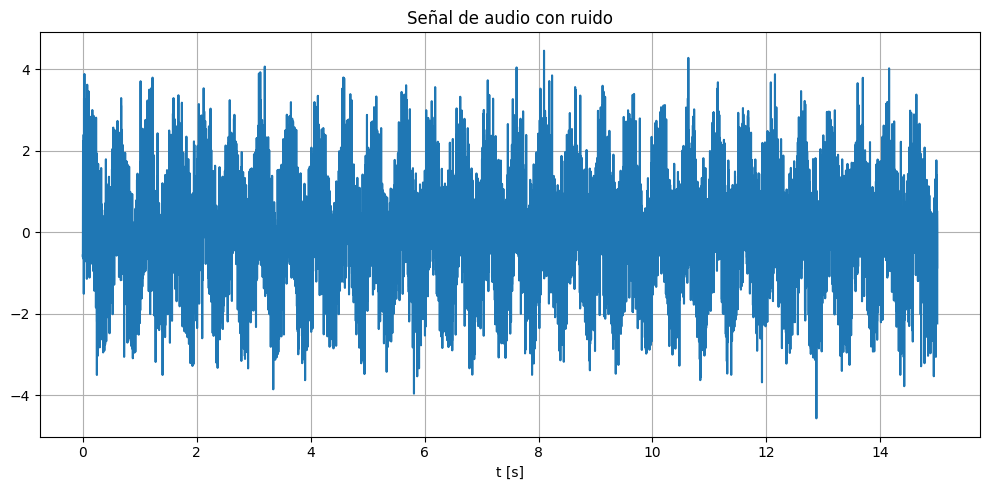

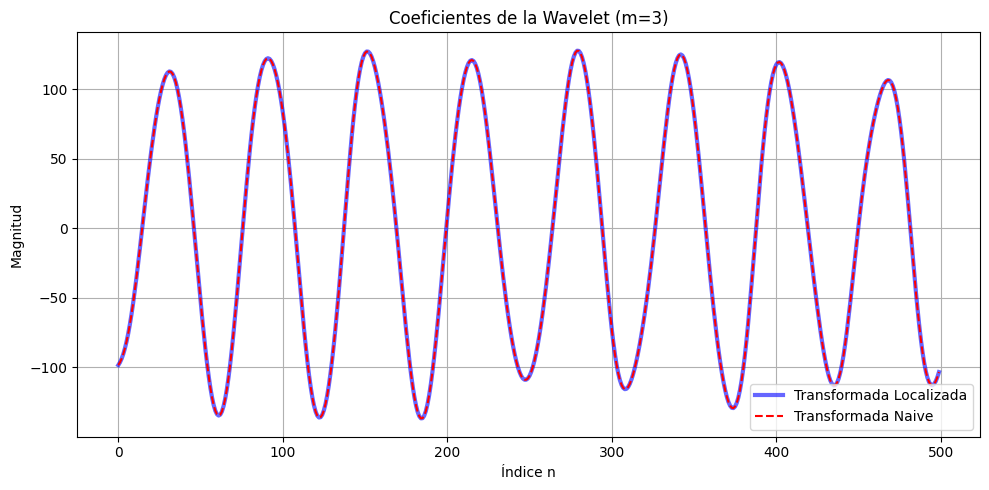

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Wavelet sombrero mexicano (mexican hat)
def mexican_hat(t):
    return (1 - t**2) * np.exp(-t**2 / 2)

# Wavelet discreta escalada y trasladada
def psi_mn(psi, m, n, length):
    a = 2 ** m
    b = n * a
    scaled_len = len(psi) * a
    psi_scaled = np.interp(np.arange(scaled_len) / a, np.arange(len(psi)), psi)
    psi_translated = np.zeros(length)
    end = min(b + scaled_len, length)
    psi_translated[b:end] = psi_scaled[:end - b]
    return psi_translated

# Transformada wavelet discreta (ventana localizada)
def twav_mn(f, psi_base, m, n):
    psi = psi_mn(psi_base, m, n, len(f))
    return np.sum(f * psi)

# Transformada naive (sin recorte, sobre todo el dominio)
def twav_mn_naive(f, psi_base, m, n):
    psi = psi_mn(psi_base, m, n, len(f))
    return np.dot(f, psi)  # Producto punto total

# Parámetros de la señal
m = 3
ns = np.arange(1000, 1500)
res = 1000
freq = 2

# Crear señal con ruido
x = np.arange(15000)
noise = np.random.normal(0, 1, len(x))
audio = np.sin(x * 2 * np.pi * freq / res) + noise

# Definir wavelet base
t = np.linspace(-5, 5, 100)
psi = mexican_hat(t)

# Aplicar transformadas
transformed_sweep = [twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweep = [twav_mn_naive(audio, psi, m, n) for n in ns]

# Graficar señal original
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(audio), dtype="float32") / res, audio)
plt.xlabel("t [s]")
plt.title("Señal de audio con ruido")
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar coeficientes wavelet
plt.figure(figsize=(10, 5))
plt.plot(transformed_sweep, color="blue", lw=3, alpha=0.6, label="Transformada Localizada")
plt.plot(naive_transformed_sweep, "r--", label="Transformada Naive")
plt.title("Coeficientes de la Wavelet (m=3)")
plt.xlabel("Índice n")
plt.ylabel("Magnitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En el gráfico se comparan dos formas de aplicar la transformada wavelet a una señal: la transformada localizada (azul) y la naive (roja punteada). La transformada localizada aplica la wavelet solo sobre una ventana específica de la señal en cada posición 𝑛, lo que permite detectar características locales, como cambios o eventos transitorios. En cambio, la versión naive aplica la wavelet sobre toda la señal en cada paso, perdiendo esa capacidad de focalizarse en un tramo específico.

### 3.3 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

     -0.15
0    -0.30
1    -0.14
2    -0.41
3    -0.46
4    -0.66
..     ...
498  -0.22
499   0.08
500  -0.08
501  -0.18
502  -0.06

[503 rows x 1 columns]


C:\Users\frama\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


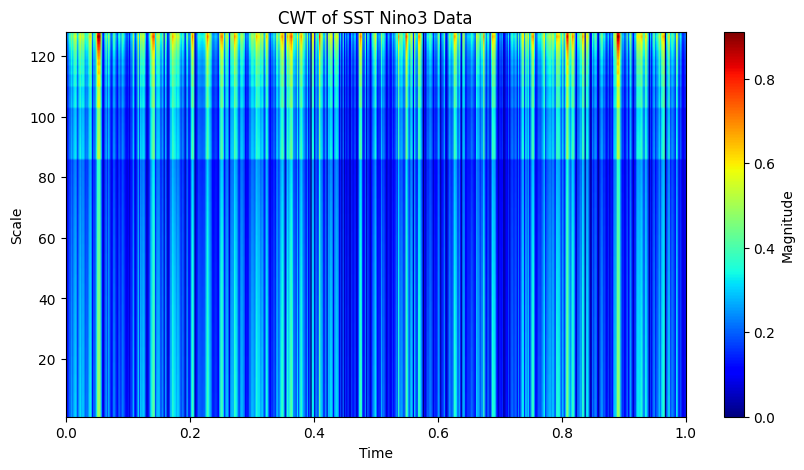

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import pandas as pd


link = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df = pd.read_table(link) #Llamamos a los datos
print(df)
df
signal = np.array(df)  # Convertir los datos a un array NumPy

coefficients, frequencies = pywt.cwt(signal, scales=np.arange(1, 128), wavelet='cmor') #Ploteamos los datos recopilidos en una wavelet

plt.figure(figsize=(10, 5))
plt.imshow(np.abs(coefficients)**0.5, aspect='auto', cmap='jet', extent=[0, 1, 1, 128])
plt.colorbar(label="Magnitude")
plt.ylabel("Scale")
plt.xlabel("Time")
plt.title("CWT of SST Nino3 Data")
plt.show()

### 3.4 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

El gráfico obtenido en el punto anterior muestra dos conjuntos de coeficientes generados por la Transformada Discreta de Wavelet (DWT):

Los **coeficientes de aproximación** ($cA$), que representan las componentes de baja frecuencia de la señal.
Los **coeficientes de detalle** ($cD$), que contienen las variaciones de alta frecuencia.

Desde un punto de vista temporal-frecuencial, los **coeficientes de aproximación** permiten observar el comportamiento general o periódico de la señal, ya que retienen su estructura de baja frecuencia. Esto se traduce en una señal más suavizada, que evidencia los componentes de mayor duración o período largo.

En cambio, los **coeficientes de detalle** revelan la información rápida de la señal, es decir, aquellas variaciones que ocurren en intervalos de tiempo más cortos (alta frecuencia). Estos coeficientes permiten identificar eventos transitorios, picos, ruido o componentes con menor período.

La combinación de ambos conjuntos de coeficientes es fundamental, ya que nos permite descomponer y entender la señal desde diferentes escalas. Esta capacidad multiescala es una de las principales ventajas de la transformada wavelet frente a otros métodos como la transformada de Fourier, ya que permite mantener información tanto del contenido en frecuencia como de su localización temporal.

El gráfico muestra cómo la DWT separa la señal original en partes que corresponden a distintos **rangos de frecuencia**, lo que permite analizar el comportamiento periódico (bajo frecuencia) y los eventos puntuales o rápidos (alta frecuencia) de manera simultánea.


## 4. Obtén el espectrograma de tu señal de audio
Sobre la señal de audio en el punto 1 de la actividad, debe presentar el espectragrama


C:\Users\frama\AppData\Local\Temp\ipykernel_24304\1448777296.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(audio_filename)


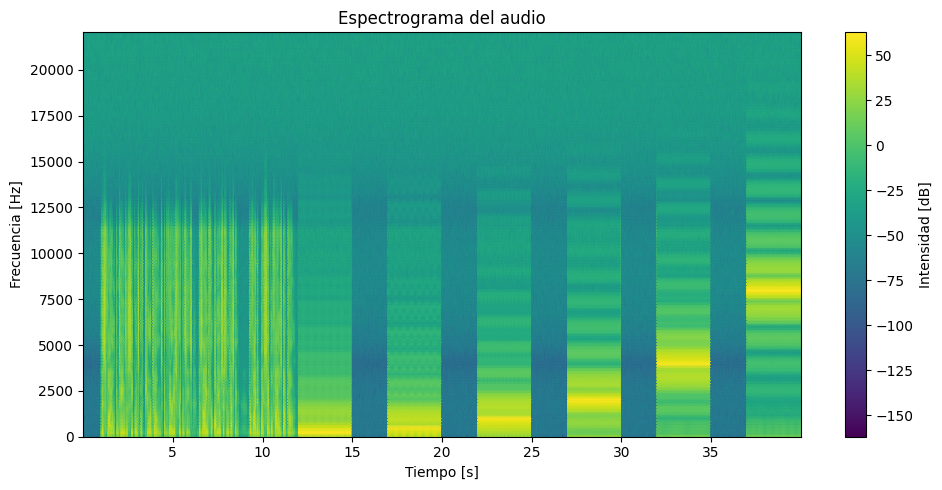

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import os

# Cargar archivo WAV local
audio_filename = "pure-tone.wav"  # Cambia esto si tu archivo tiene otro nombre

if not os.path.exists(audio_filename):
    raise FileNotFoundError(f"No se encontró el archivo: {audio_filename}")

# Leer el archivo de audio
sample_rate, audio_data = wavfile.read(audio_filename)

# Si el audio es estéreo, usar solo un canal
if len(audio_data.shape) == 2:
    audio_data = audio_data[:, 0]

# Calcular espectrograma
frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate)

# Graficar espectrograma
plt.figure(figsize=(10, 5))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title("Espectrograma del audio")
plt.ylabel("Frecuencia [Hz]")
plt.xlabel("Tiempo [s]")
plt.colorbar(label='Intensidad [dB]')
plt.tight_layout()
plt.show()

En el espectrograma se determina claramente cuando la persona habla al principio, luego se notan los momentos donde no hay audio, y luego se puede ver la concentración de energía en las frecuencias donde se escuchan los tonos puros.

## 5. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

<center><img src="../../assets/slices.png"/></center>


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Cargar archivo local
filename = "pure-tone.wav"  # Asegúrate que esté en la misma carpeta

if not os.path.exists(filename):
    raise FileNotFoundError(f"No se encontró el archivo: {filename}")

# Leer el archivo de audio
sample_rate, audio = wavfile.read(filename)

# Convertir estéreo a mono si es necesario
if len(audio.shape) == 2:
    audio = audio[:, 0]

# Parámetros de slicing
slice_duration_sec = 0.5        # duración de cada fragmento en segundos
overlap_samples = 100           # solapamiento en muestras
slice_length = int(slice_duration_sec * sample_rate)
step = slice_length - 2 * overlap_samples

if step <= 0:
    raise ValueError("El solapamiento es demasiado grande para el tamaño del fragmento.")

# Fragmentar la señal
slices = []
start = 0
while start < len(audio):
    end = start + slice_length
    fragment = audio[start:end]
    # Si el último fragmento es corto, lo dejamos como está (puedes aplicar padding si prefieres)
    slices.append(fragment)
    start += step



C:\Users\frama\AppData\Local\Temp\ipykernel_24304\1675070504.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read(filename)


## 5.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


Número total de fragmentos: 81
Tamaño de cada fragmento: 22050 muestras


C:\Users\frama\AppData\Local\Temp\ipykernel_24304\3943470644.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_np = wavfile.read(filename)


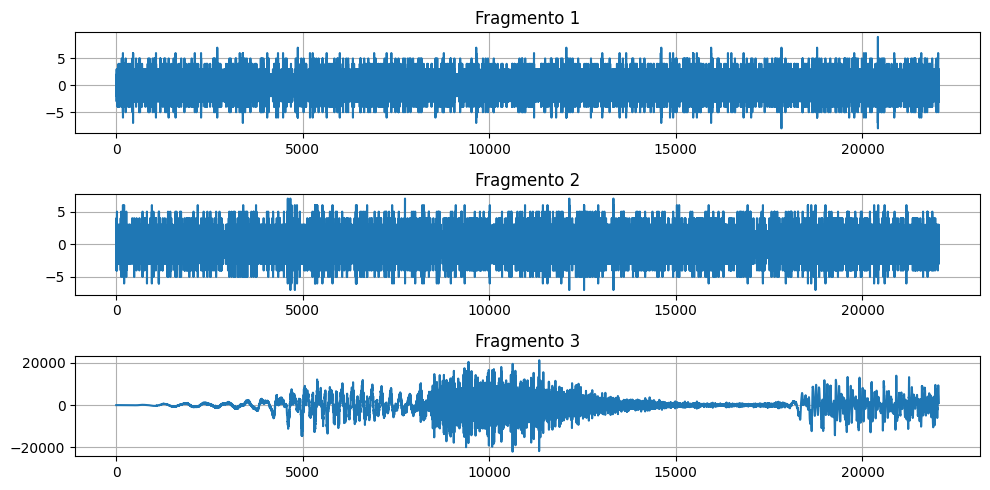

In [38]:
import torch
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import os

# Cargar archivo local
filename = "pure-tone.wav"

if not os.path.exists(filename):
    raise FileNotFoundError(f"No se encontró el archivo: {filename}")

# Leer archivo WAV
sample_rate, audio_np = wavfile.read(filename)

# Si es estéreo, tomar solo un canal
if len(audio_np.shape) == 2:
    audio_np = audio_np[:, 0]

# Convertir a tensor de PyTorch
audio = torch.tensor(audio_np, dtype=torch.float32)

# Parámetros del slicing
slice_duration_sec = 0.5
overlap_samples = 100

# Calcular tamaño del slice y paso
slice_length = int(slice_duration_sec * sample_rate)
step = slice_length - 2 * overlap_samples

# Validar valores
if step <= 0:
    raise ValueError("El solapamiento es demasiado grande para el tamaño del fragmento.")

# Generar slices
slices = []
start = 0
while start < len(audio):
    end = start + slice_length
    fragment = audio[start:end]
    # Padding si el último fragmento es más corto
    if len(fragment) < slice_length:
        fragment = torch.nn.functional.pad(fragment, (0, slice_length - len(fragment)))
    slices.append(fragment)
    start += step

# Convertir lista a tensor (batch_size, slice_length)
sliced_audio = torch.stack(slices)

print(f"Número total de fragmentos: {sliced_audio.shape[0]}")
print(f"Tamaño de cada fragmento: {sliced_audio.shape[1]} muestras")

# Visualizar los primeros 3 fragmentos
plt.figure(figsize=(10, 5))
for i in range(min(3, sliced_audio.shape[0])):
    plt.subplot(3, 1, i+1)
    plt.plot(sliced_audio[i].numpy())
    plt.title(f"Fragmento {i+1}")
    plt.grid(True)
plt.tight_layout()
plt.show()



Al aplicar slicing con PyTorch, se observa que los fragmentos extraídos muestran diferencias notables en la estructura de la señal. Mientras los primeros fragmentos contienen datos más constantes, el tercer fragmento evidencia variaciones en frecuencia o amplitud, lo que indica la presencia de un evento acústico específico en esa parte del audio.

## 6. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio, para diferentes ordenes y niveles de rizado.
Muestra gráficos con las diferentes respuestas del filtro butterworth y explica el resultado.

C:\Users\frama\AppData\Local\Temp\ipykernel_24304\645970280.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio = wavfile.read(filename)


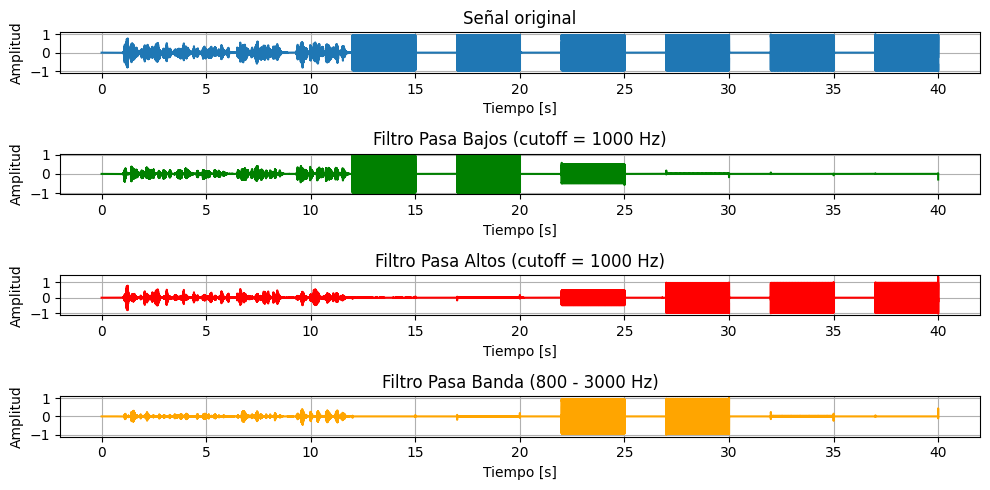

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt
import os

# === Cargar archivo local ===
filename = "pure-tone.wav"  # Cambiar si es necesario

if not os.path.exists(filename):
    raise FileNotFoundError(f"No se encontró el archivo: {filename}")

sample_rate, audio = wavfile.read(filename)

# Convertir a mono si es estéreo
if len(audio.shape) == 2:
    audio = audio[:, 0]

# Normalizar si es necesario
if audio.dtype != np.float32 and np.max(np.abs(audio)) > 1:
    audio = audio / np.max(np.abs(audio))

# Crear dominio temporal
time = np.linspace(0, len(audio) / sample_rate, len(audio))

# === Función para aplicar Butterworth ===
def aplicar_butter(audio, sample_rate, order, cutoff, btype):
    nyquist = 0.5 * sample_rate
    if btype == 'bandpass':
        normalized_cutoff = [f / nyquist for f in cutoff]
    else:
        normalized_cutoff = cutoff / nyquist
    b, a = butter(order, normalized_cutoff, btype=btype)
    return filtfilt(b, a, audio)

# Parámetros generales
order = 4

# Aplicar filtros
low_filtered = aplicar_butter(audio, sample_rate, order, 1000, 'low')
high_filtered = aplicar_butter(audio, sample_rate, order, 1000, 'high')
band_filtered = aplicar_butter(audio, sample_rate, order, [800, 3000], 'bandpass')

# === Graficar resultados ===
plt.figure(figsize=(10, 5))

plt.subplot(4, 1, 1)
plt.plot(time, audio)
plt.title("Señal original")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.subplot(4, 1, 2)
plt.plot(time, low_filtered, color='green')
plt.title("Filtro Pasa Bajos (cutoff = 1000 Hz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(time, high_filtered, color='red')
plt.title("Filtro Pasa Altos (cutoff = 1000 Hz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(time, band_filtered, color='orange')
plt.title("Filtro Pasa Banda (800 - 3000 Hz)")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.grid(True)

plt.tight_layout()
plt.show()




Se aplicaron tres variantes del filtro de Butterworth a la señal de audio original:

**Filtro Pasa Bajos** (cutoff = 1000 Hz): eliminó las frecuencias altas, dejando solo las variaciones lentas o graves. La señal resultante es más suave y menos ruidosa.

**Filtro Pasa Altos** (cutoff = 1000 Hz): eliminó las frecuencias bajas, dejando los componentes agudos. Se perciben más los detalles rápidos y los bordes.

**Filtro Pasa Banda** (entre 800 y 3000 Hz): permitió solo un rango medio de frecuencias. Se eliminan tanto los graves como los agudos fuera del rango, lo que puede ayudar a aislar contenido útil o deseado.

Estos filtros son útiles para **limpiar señales**, **resaltar ciertos componentes** o preparar datos para análisis posteriores (por ejemplo, detección de eventos o clasificación).


## 7. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html

[pure tone] https://sample-files.com/audio/wav/